In [1]:
import warnings

warnings.filterwarnings(action='ignore') 

In [7]:
from datetime import datetime
from os import listdir
from os.path import isfile, join

import librosa
import librosa.display

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from keras.models import load_model
import tensorflow as tf
import PIL.Image as Image
import matplotlib.pyplot as plt
import cv2
import tensorflow_hub as hub


In [4]:
from google.colab import drive
drive.mount('/content/drive')

# 폴더 이동
%cd drive/My Drive/audio_predict
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/audio_predict
/content/drive/My Drive/audio_predict


In [8]:
def manipulate(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

# audio file load
def load_audio_file(file_path):
    input_length = 22050*5
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 5, len(data)), data)
    plt.show()

In [9]:
 model = load_model('efficientnet_audio.h5')
 feature_model = tf.keras.models.load_model(('efficientnet_feature.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

In [57]:
def prediction(image,model,feature_model):
    img = cv2.imread(image)
    img = cv2.resize(img, dsize=(224,224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    feature_vector = feature_model.predict(img)
    prediction = model.predict(feature_vector)[0]
    unique_sorted_Y = ['0','1']
    top_3_predict = prediction.argsort()[::-1]
    labels = [unique_sorted_Y[index] for index in top_3_predict]

    return labels[0]

In [58]:
#원본 file & mel spectrogram 나타내기
def image_pred(audio):
    data = load_audio_file(audio)

    S = librosa.feature.melspectrogram(data, sr=22050, n_mels=128) 
    S_DB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_DB, sr=22050)
    audio = audio.split('/')[-1][:-4]
    image_path = './test_image/'+ audio +'.jpg'
    plt.savefig(image_path)

    res = prediction(image_path,model,feature_model)
    
    return res

[1.96221924 1.03778077]


'0'

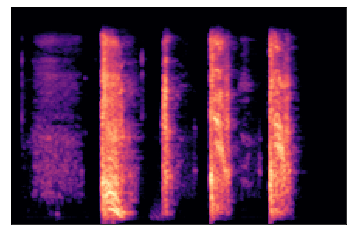

In [44]:
image_pred('train_cough_data/neg_cough/0KOy96zEUfdMY4rZzwrDT0gMPDa2cough-heavy.wav')

In [ ]:
# #전체 경로
# mypath = "test_audio/0"
# filenames = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f.endswith('.mp3'))] 
# print(filenames)

In [ ]:
# super = 0
# juyeon = 0

# for i in filenames:
#     res = image_pred('test_audio/1/'+ i)
#     if res == '0':
#         super +=1
#     else:
#         juyeon +=1

In [ ]:
# from tqdm import tqdm
# super = 0
# juyeon = 0

# for i in tqdm(filenames):
#     res = image_pred('test_audio/0/'+ i)
#     if res == '0':
#         super +=1
#     else:
#         juyeon +=1

In [ ]:
# print(super,juyeon)